Breast Cancer Prediction Using Neural Network :
This project aims to build a machine learning model that can predict whether breast cancer is benign (non-cancerous) or malignant (cancerous) using the famous Breast Cancer Wisconsin Dataset from scikit-learn. The dataset contains various medical measurements for breast cancer cell features, and the goal is to classify cancer cases based on these features.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Segment 2: Loading and Downloading Dataset -
In this segment, you will load the dataset and provide an option to download it as a CSV file.

In [ ]:
# Load the breast cancer dataset
def load_dataset():
    # Load dataset from sklearn
    data = load_breast_cancer()
    X = data.data
    y = data.target
    return X, y, data.feature_names, data.target_names

# Load dataset
X, y, feature_names, target_names = load_dataset()

# Create a DataFrame for better visualization and data handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display the first few rows of the dataset
df.head()

# Save the dataset as a CSV file
df.to_csv('breast_cancer_dataset.csv', index=False)
print("Dataset saved as 'breast_cancer_dataset.csv'")

Dataset saved as 'breast_cancer_dataset.csv'


In [ ]:
# If using Google Colab, allow the user to download the CSV file
from google.colab import files
files.download('breast_cancer_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Segment 3: Data Preprocessing  -
This segment handles data splitting, normalization, and cleaning if necessary.

In [ ]:
# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for better performance in the neural network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shape of the training data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (455, 30)
Test data shape: (114, 30)


Segment 4: Data Visualization -
This segment helps visualize important relationships in the dataset using graphs.

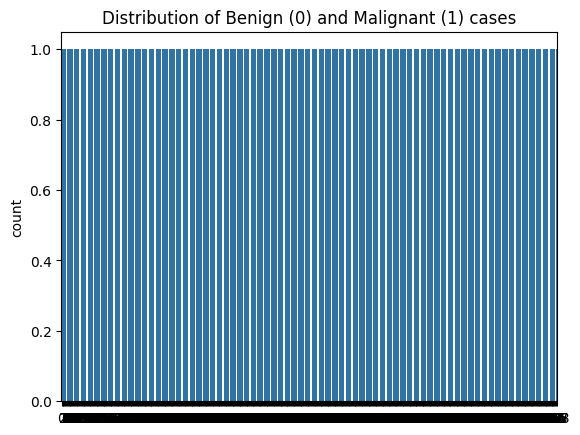

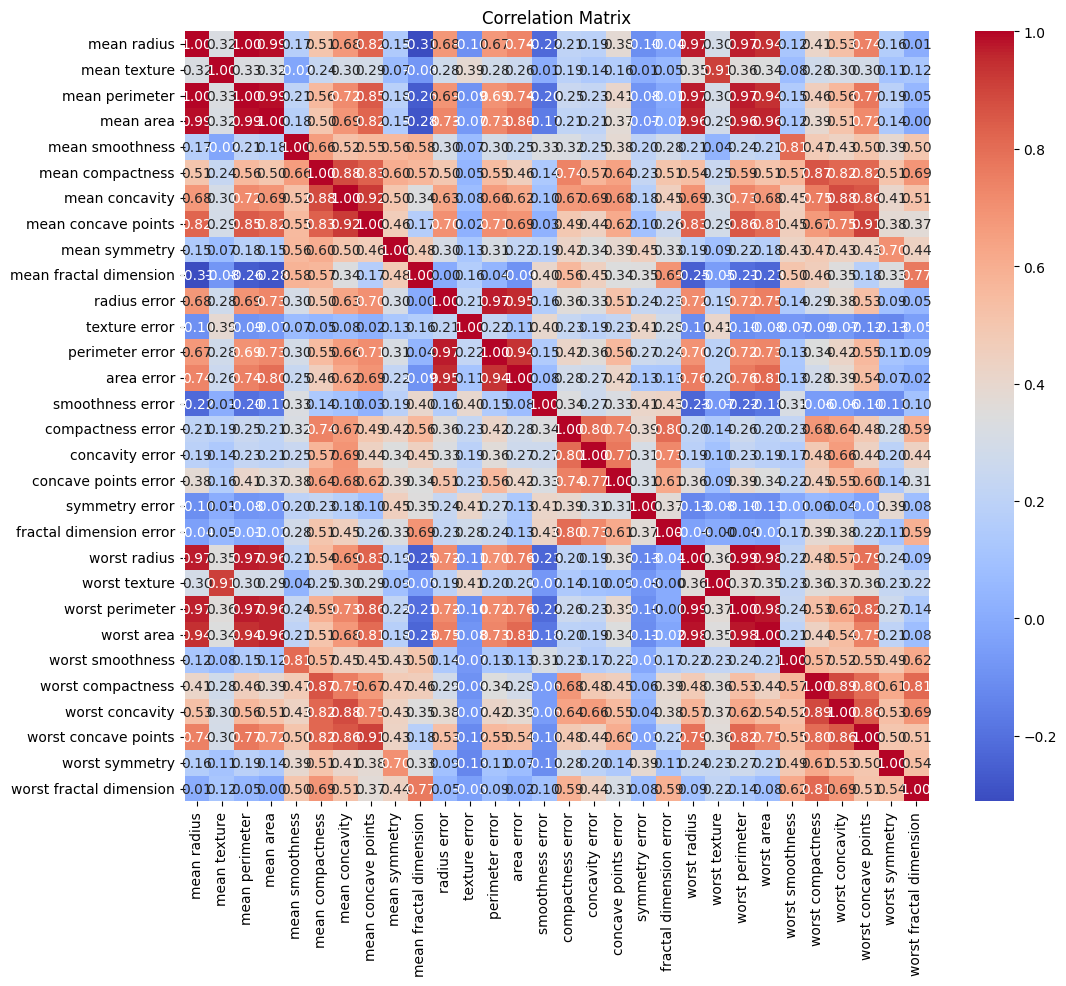

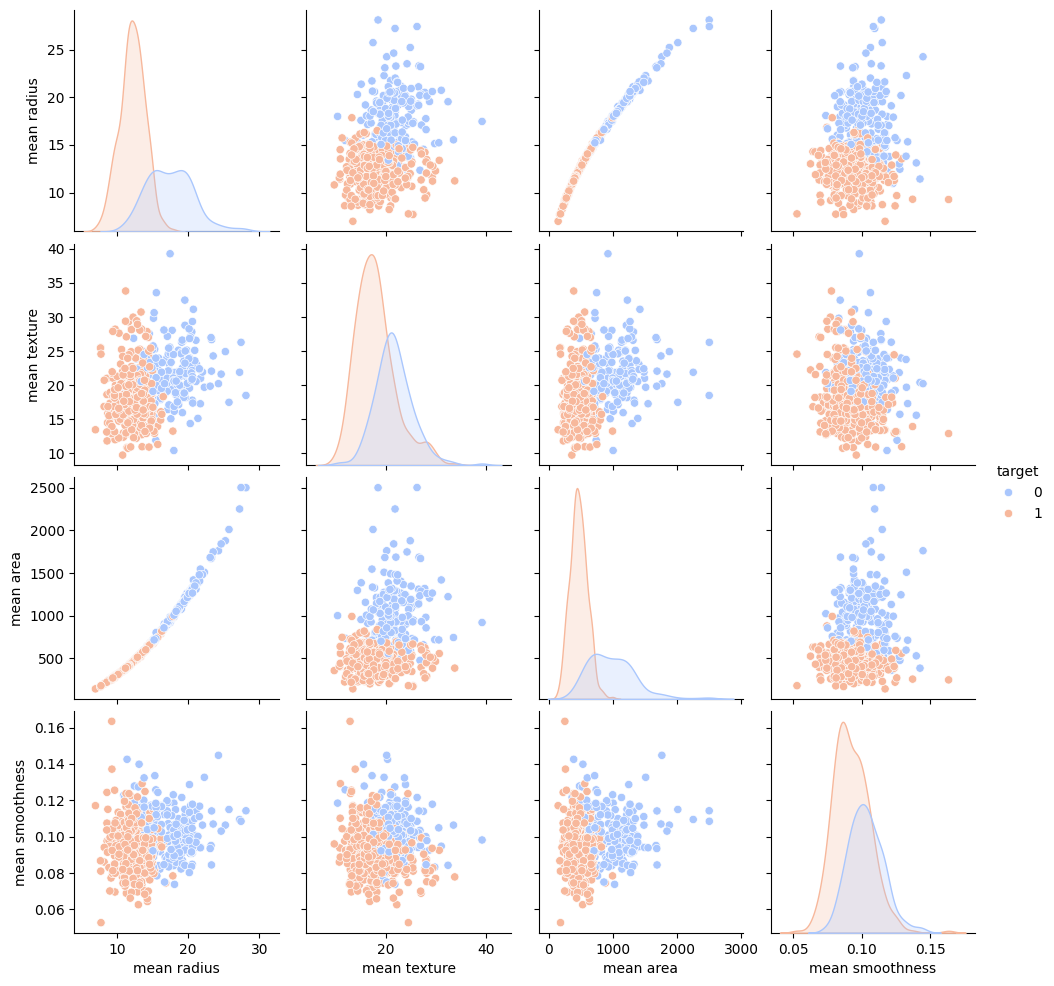

In [ ]:
# Visualizing the distribution of classes (Benign vs Malignant)
sns.countplot(df['target'])
plt.title('Distribution of Benign (0) and Malignant (1) cases')
plt.show()

# Plotting correlations between features
plt.figure(figsize=(12, 10))
correlation_matrix = pd.DataFrame(X, columns=feature_names).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of selected features to visualize their relationships
selected_features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']
sns.pairplot(df, vars=selected_features, hue='target', palette='coolwarm')
plt.show()

Segment 5: Building and Training the Neural Network -
This segment builds the neural network model and trains it on the dataset.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7108 - loss: 0.5670 - val_accuracy: 0.9737 - val_loss: 0.2782
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9353 - loss: 0.2727 - val_accuracy: 0.9737 - val_loss: 0.1614
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.1749 - val_accuracy: 0.9737 - val_loss: 0.1137
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9628 - loss: 0.1299 - val_accuracy: 0.9825 - val_loss: 0.0895
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.1182 - val_accuracy: 0.9825 - val_loss: 0.0744
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.1088 - val_accuracy: 0.9825 - val_loss: 0.0644
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.0681 - val_accuracy: 0.9825 - val_loss: 0.0597
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9891 - loss: 0.0641 - val_accuracy: 0.9825 - val_loss:

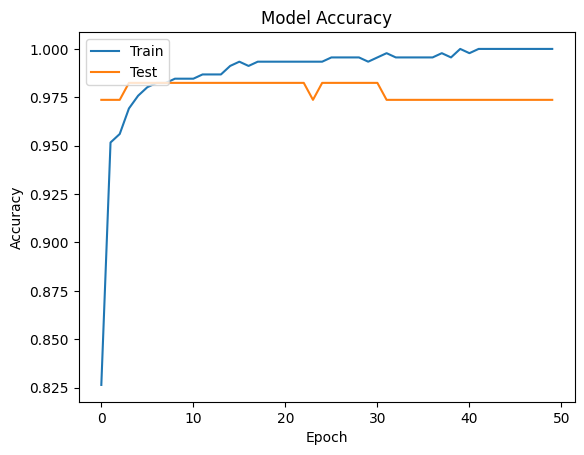

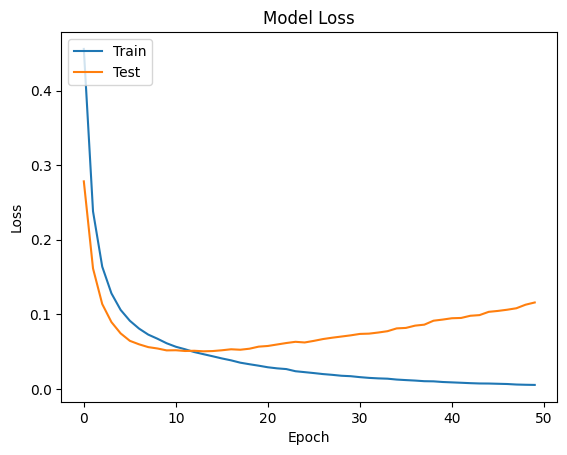

In [ ]:
# Build a simple neural network model using TensorFlow
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Segment 6: Evaluating the Model -
In this segment, we evaluate the model using test data and print the classification report.

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9707 - loss: 0.1459 
Test Accuracy: 0.9737
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Segment 7: Conclusion - Benign or Malignant? -
Each test instance as either benign or malignant based on model predictions.

In [ ]:
# Loop through test samples and allow user to select a sample number to check prediction
while True:
    try:
        # Ask the user to input a sample number (1 to n)
        n_samples = len(y_test)
        print(f"There are {n_samples} test samples available.")
        sample_num = int(input(f"Enter a sample number (1 to {n_samples}) to check if it's malignant or benign (or 0 to exit): "))

        # Exit if the user inputs 0
        if sample_num == 0:
            print("Exiting the sample prediction.")
            break

        # Check if the input is within the valid range
        if 1 <= sample_num <= n_samples:
            # Get the prediction for the selected sample
            prediction = 'Malignant' if y_pred[sample_num - 1] == 1 else 'Benign'
            actual = 'Malignant' if y_test[sample_num - 1] == 1 else 'Benign'

            # Print the result
            print(f"Sample {sample_num}: Predicted as {prediction} - Actual: {actual}")
        else:
            print(f"Invalid sample number. Please enter a number between 1 and {n_samples}.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

There are 114 test samples available.
Enter a sample number (1 to 114) to check if it's malignant or benign (or 0 to exit): 77
Sample 77: Predicted as Malignant - Actual: Malignant
There are 114 test samples available.
Enter a sample number (1 to 114) to check if it's malignant or benign (or 0 to exit): 0
Exiting the sample prediction.
